# Let's do more examples!
First in one dimension

In [1]:
# The usual!
import numpy as np
import matplotlib.pyplot as plt # For plotting
import pandas as pd # For loading and handling data
# all plots should appear directly within the notebook
%matplotlib inline

import PIL

Load some signal - this is an audio signal.

Text(0.5, 1.0, 'Freqeuency spectrum')

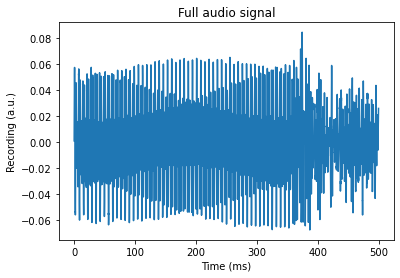

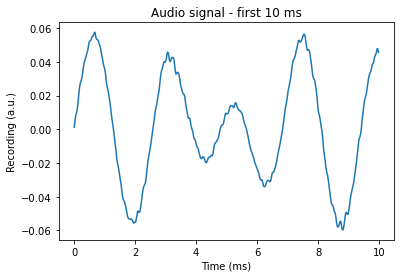

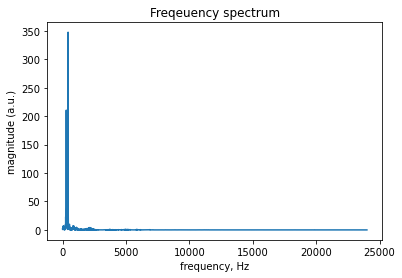

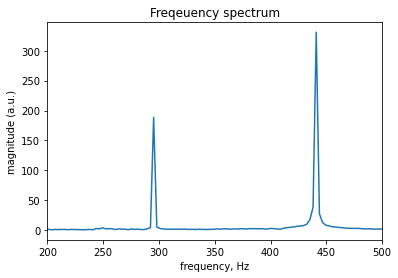

In [2]:
# Load data
data = pd.read_csv('Audio data.csv', delimiter=';')
#data = pd.read_csv('Audio data pure a.csv')

# Assign headers as labels
labels = data.keys()

# Use the labels to extract data
t = np.array(data[labels[0]])
recording = np.array(data[labels[1]])

# Plot the data
plt.plot(t, recording)
plt.xlabel(labels[0]);plt.ylabel(labels[1]);plt.title('Full audio signal')

plt.figure()
plt.plot(t[(t<10)], recording[t<10])
plt.xlabel(labels[0]);plt.ylabel(labels[1]);plt.title('Audio signal - first 10 ms')

#frequencies
frequency = np.linspace(1,1/(t[1]-t[0])/2*1e3,len(t)//2+1)
ft = np.fft.rfft(recording)

plt.figure()
plt.plot(frequency,np.abs(ft))
plt.xlabel('frequency, Hz');plt.ylabel('magnitude (a.u.)');plt.title('Freqeuency spectrum')
#plt.xlim(200,500)

#frequencies again, but with a cut!
frequency = np.linspace(1,1/(t[1]-t[0])/2*1e3,len(t[t<350])//2+1)
ft = np.fft.rfft(recording[t<350])

plt.figure()
plt.plot(frequency,np.abs(ft))
plt.xlim(200,500)
plt.xlabel('frequency, Hz');plt.ylabel('magnitude (a.u.)');plt.title('Freqeuency spectrum')
#plt.plot(np.arctan(np.imag(ft)/(np.real(ft)+0.00000000001)))

# And in two dimensions

The two-dimensional Fourier transform - completely analogous to the one-dimensional: 
\begin{align}
    F[m,n] = \frac{1}{MN}\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f[x,y]\exp\left(-2i\pi (xm/M + yn/N)\right)
\end{align}
and
\begin{align}
    f[m,n] = MN\sum_{m=0}^{M-1}\sum_{n=0}^{N-1} F[m,n]\exp\left(2i\pi (xm/M + yn/N)\right)
\end{align}
Pay attention! Here we normalize as it is done already in Python. 

I will suggest that you use 
[```numpy.fft.fft2```](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html#numpy.fft.fft2) in combination with 
[```numpy.fft.fftshift```](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html#numpy.fft.fftshift).



Let's see some examples.

In [3]:
gridpoints = 32
coordinates = np.linspace(0.0, 1.0, gridpoints)
X,Y = np.meshgrid(coordinates-0.5,coordinates-0.5)
#np.fft.rfft2(data)

Text(0, 0.5, 'Sample sample of 2nd axis')

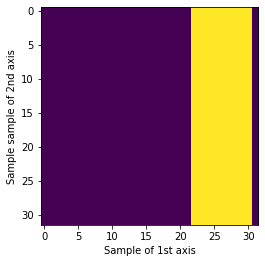

In [4]:
data = np.sin(X*1.2*2*np.pi)
data = 1*[(X>0.2)&(X<0.5)][0]
#data[10,:] = np.sin(X[10,:]*4*np.pi)*2
#data = np.sin(X*2*np.pi+6*Y*2*np.pi)
plt.imshow(data)

plt.xlabel('Sample of 1st axis')
plt.ylabel('Sample sample of 2nd axis')

(32, 32)


Text(0, 0.5, 'Frequency sample of 2nd axis')

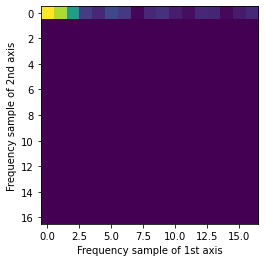

In [5]:
print(data.shape)
ft = np.fft.rfft2(data)

plt.imshow(np.abs(np.fft.rfft2(data)))
                                     
plt.imshow(np.abs(np.fft.rfft2(data)[:ft.shape[0]//2+1,:]))
#plt.imshow(np.log(np.abs(np.fft.rfft2(data)[:ft.shape[0]//2+1,:])))
plt.xlabel('Frequency sample of 1st axis')
plt.ylabel('Frequency sample of 2nd axis')

In [6]:
np.fft.rfft2(data).shape

(32, 17)

# Apply filters in two-dimensions

(830, 1108, 3)


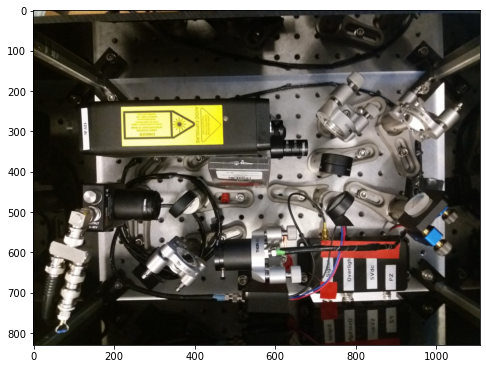

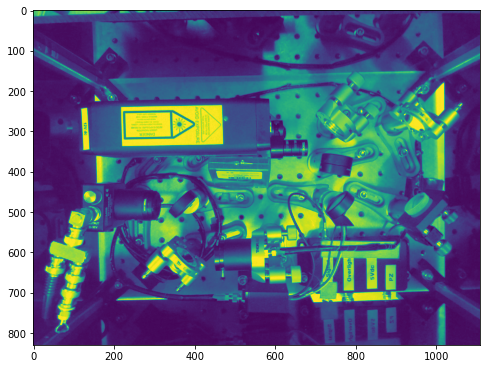

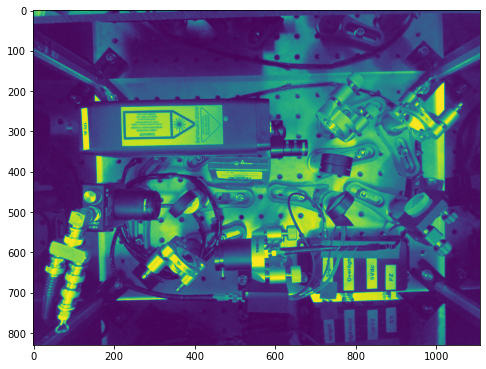

In [7]:
image1 = np.array(PIL.Image.open('figs/sinle_photon_interferometer.jpg'))
plt.figure(figsize=(8,8))
plt.imshow(image1)

imageShape = image1.shape
print(imageShape)
plt.figure(figsize=(8,8))
plt.imshow(image1[:,:,0])

plt.figure(figsize=(8,8))
plt.imshow(np.mean(image1, axis=-1))#, cmap = 'gray')

image1BW = np.mean(image1, axis=-1)

Now we want to apply some filter.

Note that we have the same number of samples per unit-length for the two dimensions. 

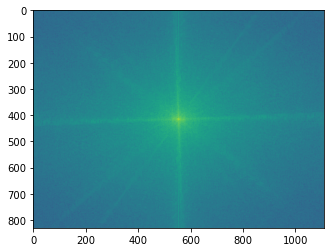

In [8]:
y = np.linspace( 0, imageShape[0]/(imageShape[0]), imageShape[0]) -0.5     # columns (Width)
x = np.linspace( 0, imageShape[1]/(imageShape[1]), imageShape[1]) -0.5

X,Y = np.meshgrid(x,y)

ft = np.fft.fftshift(np.fft.fft2(image1BW))

plt.imshow((np.abs(ft)))
plt.imshow(np.log(np.abs(ft)))

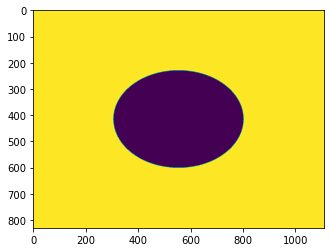

In [9]:
highPassFilter = (X**2+Y**2)>0.05
plt.imshow(highPassFilter)



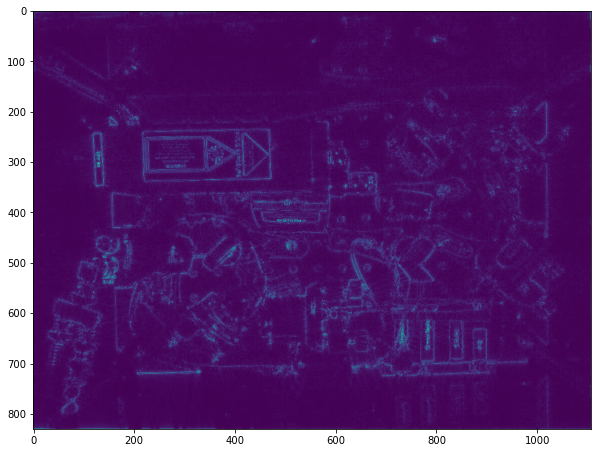

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(np.fft.ifft2(highPassFilter*ft)))

To summarize:

* We have seen how to do discrete Fourier transforms in python
    * 'forwards' and 'backwards'
    * In one and two dimensions
* We have seen that Fourier transforms give access to crucial information from time-series
* We have seen how we can manipulate the frequency components of a signal and thereby the signal itself

We have NOT talked about:
* The periodicity of Fourier transforms - there are some boundary conditions which are important to consider
* What the difference between the real and the complex Fourier transform actually is
* How the fast Fourier transform works. 
* ...




# Final important point: Power in the frequency components
Let's return to one dimension again

(0.0, 10.0)

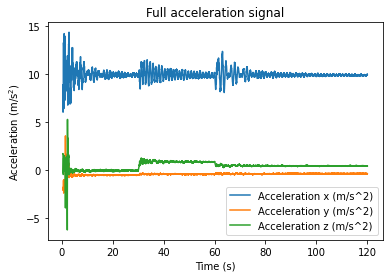

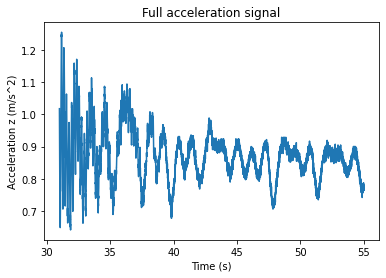

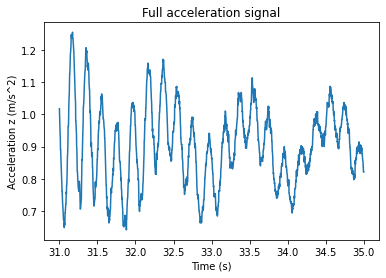

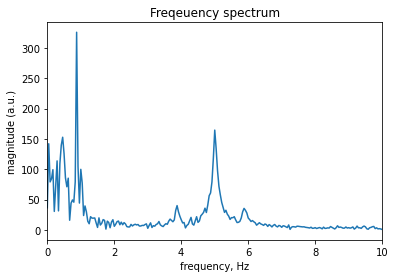

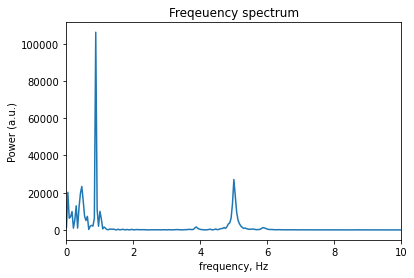

In [15]:
# Load data
data = pd.read_csv('Raw Data.csv')
#data = pd.read_csv('Audio data pure a.csv')

# Assign headers as labels
labels = data.keys()

# Use the labels to extract data
times = np.array(data[labels[0]])

# Plot the data
for label in labels[1:-1]:
    plt.plot(times, data[label], label=label)
    #plt.plot(times[(times<55)&(times>30)], data[label][(times<55)&(times>30)], label=label)
plt.xlabel(labels[0]);plt.ylabel('Acceleration (m/s$^2$)');plt.title('Full acceleration signal')
plt.legend()

plt.figure()
plt.plot(times[(times<55)&(times>31)], data[labels[3]][(times<55)&(times>31)], label=label)
plt.xlabel(labels[0]);plt.ylabel(labels[3]);plt.title('Full acceleration signal')

plt.figure()
plt.plot(times[(times<35)&(times>31)], data[labels[3]][(times<35)&(times>31)], label=label)
plt.xlabel(labels[0]);plt.ylabel(labels[3]);plt.title('Full acceleration signal')

#frequencies
t = times[(times<55)&(times>31)]
frequency = np.linspace(0,1/(t[1]-t[0])/2,len(t)//2+1)
ft = np.fft.rfft(data[labels[3]][(times<55)&(times>31)]- np.mean(data[labels[3]][(times<55)&(times>30)]))

plt.figure()
plt.plot(frequency,(np.abs(ft)))
plt.xlabel('frequency, Hz');plt.ylabel('magnitude (a.u.)');plt.title('Freqeuency spectrum')
plt.xlim(0,10)

plt.figure()
plt.plot(frequency,np.abs(ft)**2)
plt.xlabel('frequency, Hz');plt.ylabel('Power (a.u.)');plt.title('Freqeuency spectrum')
plt.xlim(0,10)
#plt.plot(np.arctan(np.imag(ft)/(np.real(ft)+0.00000000001)))